In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [134]:
dataFrame=pd.read_excel("merc.xlsx")  # 6 özellik(x),1 tane de sonuc(y) yani fiyat 

In [135]:
dataFrame.head()  # ilk 5 satırı alıp neye benzediğini inceleyelim 

,year,price,transmission,mileage,tax,mpg,engineSize
0,2005,5200,Automatic,63000,325,32.1,1.8
1,2017,34948,Automatic,27000,20,61.4,2.1
2,2016,49948,Automatic,6200,555,28.0,5.5
3,2016,61948,Automatic,16000,325,30.4,4.0
4,2016,73948,Automatic,4000,325,30.1,4.0


## model  , fiyat(pound), vites(aouto,mauel), km(mil),vergi, yakıt, motor boyutu

In [136]:
dataFrame.describe()  # özelliklei inceleyip veriyi anlamaya çalışıyoruz
# 13.119 veri var, ortalamaları, sd, max,min vs  

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


In [137]:
dataFrame.isnull()  # null olmayan yerlere false yazıyor

,year,price,transmission,mileage,tax,mpg,engineSize
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
13114,False,False,False,False,False,False,False
13115,False,False,False,False,False,False,False
13116,False,False,False,False,False,False,False
13117,False,False,False,False,False,False,False


In [138]:
dataFrame.isnull().sum() # eksik veri adetini gösterir

year            0
price           0
transmission    0
mileage         0
tax             0
mpg             0
engineSize      0
dtype: int64

## Grafiklendirme, verilerin birbirleri arasındaki ilişkiyi görmek için

<AxesSubplot:xlabel='price', ylabel='Count'>

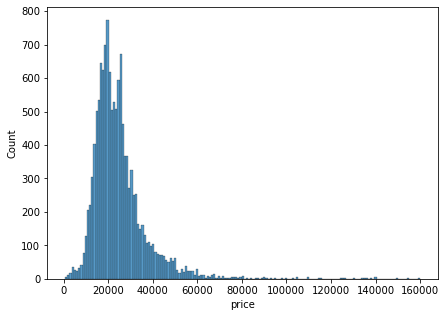

In [139]:
plt.figure(figsize=(7,5)) # grafiği büyütmek için
sbn.histplot(dataFrame["price"])

C:\Users\Onur\.conda\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

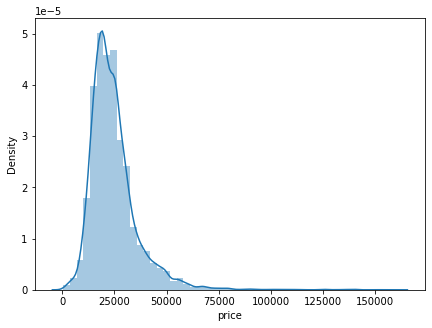

In [140]:
plt.figure(figsize=(7,5)) # grafiği büyütmek için
sbn.distplot(dataFrame["price"])

## Yüksek fiyata satılan tek tük araçlardan dolayı ortalama fiyat doğru çıkmayabilir. Bu değerlerden bazılarını silebilirdik, yada hem silip hem silmeden deneyebiliriz 

C:\Users\Onur\.conda\envs\tensorflow\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='year', ylabel='count'>

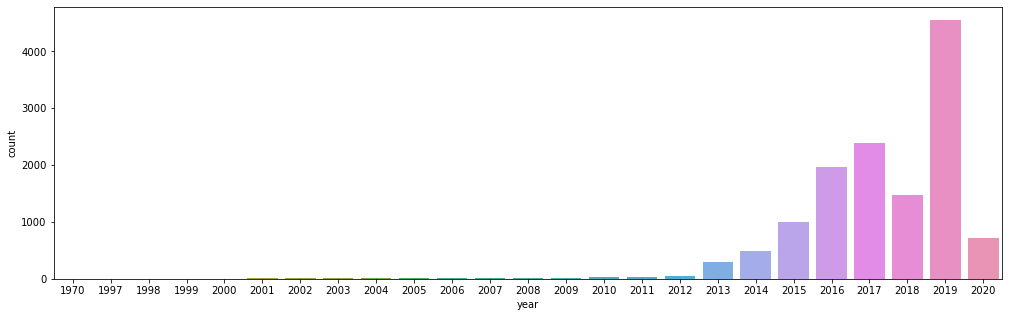

In [141]:
plt.figure(figsize=(17,5)) # grafiği büyütmek için
sbn.countplot(dataFrame["year"]) # sayılarda countplot

## Grafikten 2019 model aracın cok fazla olduğunu anlıyoruz, ama ortalama 2017 cıkmıstı cünkü eski modellerde yogunluk fazla

In [142]:
dataFrame.corr() # korelasyonları, ilişkileri görüntüleyelim

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.520712,-0.738027,0.012480,-0.094626,-0.142147
price,0.520712,1.000000,-0.537214,0.268717,-0.438445,0.516126
mileage,-0.738027,-0.537214,1.000000,-0.160223,0.202850,0.063652
tax,0.012480,0.268717,-0.160223,1.000000,-0.513742,0.338341
mpg,-0.094626,-0.438445,0.202850,-0.513742,1.000000,-0.339862
engineSize,-0.142147,0.516126,0.063652,0.338341,-0.339862,1.000000


In [143]:
dataFrame.corr()["price"] # fiyata göre korelasyonları yaz

year          0.520712
price         1.000000
mileage      -0.537214
tax           0.268717
mpg          -0.438445
engineSize    0.516126
Name: price, dtype: float64

In [144]:
dataFrame.corr()["price"].sort_values() # küçükten büyüğe doğru korelasyonları yazar

mileage      -0.537214
mpg          -0.438445
tax           0.268717
engineSize    0.516126
year          0.520712
price         1.000000
Name: price, dtype: float64

In [145]:
# tax yani vergi arttıkca fiyatta artıyor, normalde tersi 
#olmalı ama burada muhtemelen 
#motor gücü ile alakalı olduğu için yüksek motor yüksek vergi mantığı ile. Bu arada motor gücü vergiden cok etkiliyor
# vites kategorik olduğu için onu almadı,transmission. Bunu 1-0 yaparak dahil edebiliriz

<AxesSubplot:xlabel='mileage', ylabel='price'>

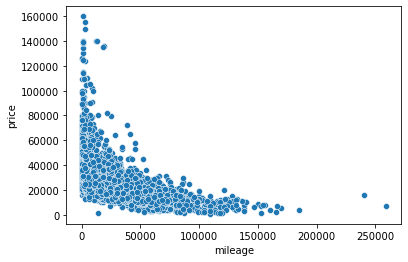

In [146]:
sbn.scatterplot(x= "mileage",y ="price",data=dataFrame)  # y gitmek istediğimiz veri
# mileage(km,kullanım) arttıkça fiyatın hızla düştüğünü görüyoruz

In [147]:
dataFrame.sort_values("price",ascending= False).head(20) 
#fiyatı (price) en yüksek 20 değeri aldık
# modeli güçlendirmek için bu değerleri çıkarabiliriz

,year,price,transmission,mileage,tax,mpg,engineSize
6199,2020,159999,Semi-Auto,1350,145,21.4,4.0
10044,2020,154998,Automatic,3000,150,21.4,4.0
5,2011,149948,Automatic,3000,570,21.4,6.2
8737,2019,140319,Semi-Auto,785,150,22.1,4.0
6386,2018,139995,Semi-Auto,13046,145,21.4,4.0
8,2019,139948,Automatic,12000,145,21.4,4.0
9133,2019,139559,Semi-Auto,1000,145,22.1,4.0
8821,2020,138439,Semi-Auto,1000,145,22.1,4.0
5902,2018,135771,Semi-Auto,19000,145,21.4,4.0
7864,2018,135124,Semi-Auto,18234,150,21.4,4.0


In [148]:
dataFrame.sort_values("price",ascending= True).head(20) 
# en ucuzlar sacma sekilde grafiğe dahil olmamış, bu yüzden bunlara dokunmaya gerek yok

,year,price,transmission,mileage,tax,mpg,engineSize
11816,2003,650,Manual,109090,235,40.0,1.4
12008,2010,1350,Manual,116126,145,54.3,2.0
11765,2000,1490,Automatic,87000,265,27.2,3.2
11549,2002,1495,Automatic,13800,305,39.8,2.7
12594,2004,1495,Manual,119000,300,34.5,1.8
11174,2001,1695,Automatic,108800,325,31.7,3.2
12710,2006,1695,Automatic,153000,300,33.6,1.8
12766,2004,1780,Automatic,118000,265,41.5,2.2
12009,2007,1800,Automatic,84000,200,42.8,1.5
11764,1998,1990,Automatic,99300,265,32.1,2.3


In [149]:
len(dataFrame)
# veriyi temizlerken yüzde 1 ini eksiltmek genelde veriyi bozmaz

13119

In [150]:
len(dataFrame)*0.01

131.19

## Veri Temizliği

In [151]:
newdf=dataFrame.sort_values("price",ascending=False).iloc[131:] # en yüksekleri indekse göre sil
# bunu tek tek elle de yapabilirdik, çünkü 0 km son model arac için yüksek fiyat doğal ancak eski model yada km yüksek aracları bu şekilde verildiğinde silebiliriz

<AxesSubplot:xlabel='price', ylabel='Count'>

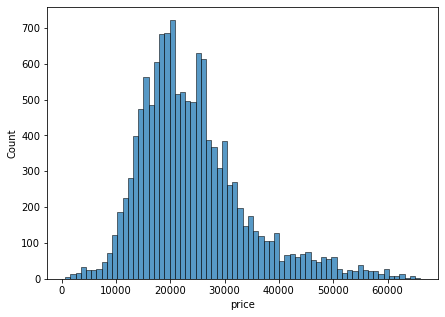

In [152]:
plt.figure(figsize=(7,5)) # grafiği büyütmek için
sbn.histplot(newdf["price"])
# görülen o ki artık çok uçuk fiyatlar yok

In [153]:
newdf.describe() # yeni verinin özeti, uçuk verilerden kurtulunca daha uygun bir veri elde ettik

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


In [154]:
dataFrame.describe()
# eger yeni veri ile tablo özetlerini karşılaştırırsak ciddi bir farklılık olmadığını görürüz

,year,price,mileage,tax,mpg,engineSize
count,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000,13119.000000
mean,2017.296288,24698.596920,21949.559037,129.972178,55.155843,2.071530
std,2.224709,11842.675542,21176.512267,65.260286,15.220082,0.572426
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17450.000000,6097.500000,125.000000,45.600000,1.800000
50%,2018.000000,22480.000000,15189.000000,145.000000,56.500000,2.000000
75%,2019.000000,28980.000000,31779.500000,145.000000,64.200000,2.100000
max,2020.000000,159999.000000,259000.000000,580.000000,217.300000,6.200000


C:\Users\Onur\.conda\envs\tensorflow\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

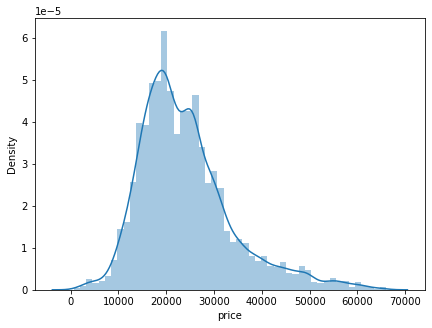

In [155]:
plt.figure(figsize=(7,5)) 
sbn.distplot(newdf["price"])
# ideal bir grafik, daha fazla kırpmaya gerek yok, şuan verinin yüzde 99 u hayla bizim elimizde

In [156]:
dataFrame.groupby("year").mean()["price"] # yıllara göre gruplayıp, ortalama fiyatını aldık
#1970 modelde fiyat yüksek biraz çünkü antika gibi veya özel birini arabası ama bu veri için bir gürültüdür. 2018 model arac gibi bir fiyat

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

In [157]:
newdf.groupby("year").mean()["price"] 
# yüksek fiyatlı verileri düzenledik ama düşüklere el atmadık

year
1970    24999.000000
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [158]:
dataFrame[dataFrame.year != 1970].groupby("year").mean()["price"]
# 1970 leri gösterme dedik, eğer birşeye eşitlersek artık yeni veriyi oraya aktarmış olurduk

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011    12624.894737
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16731.780020
2016    19307.892948
2017    21514.307854
2018    25720.162918
2019    31290.020865
2020    35433.282337
Name: price, dtype: float64

In [159]:
dataFrame=newdf
# yenidf yi dataFrame e atadık

In [160]:
dataFrame

,year,price,transmission,mileage,tax,mpg,engineSize
6177,2019,65990,Semi-Auto,5076,150,30.4,3.0
5779,2020,65990,Semi-Auto,999,145,28.0,4.0
3191,2020,65980,Semi-Auto,3999,145,28.0,4.0
4727,2019,65000,Semi-Auto,3398,145,27.2,4.0
8814,2019,64999,Semi-Auto,119,145,40.9,3.0
...,...,...,...,...,...,...,...
11549,2002,1495,Automatic,13800,305,39.8,2.7
12594,2004,1495,Manual,119000,300,34.5,1.8
11765,2000,1490,Automatic,87000,265,27.2,3.2
12008,2010,1350,Manual,116126,145,54.3,2.0


In [161]:
dataFrame.describe()

,year,price,mileage,tax,mpg,engineSize
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000
mean,2017.281876,24074.926933,22132.741146,129.689714,55.437142,2.050901
std,2.228515,9866.224575,21196.776401,65.183076,15.025999,0.532596
min,1970.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17357.500000,6322.000000,125.000000,45.600000,1.675000
50%,2018.000000,22299.000000,15369.500000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31982.250000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


In [162]:
dataFrame=dataFrame[dataFrame.year != 1970]
# 1970 leri de attık

In [163]:
dataFrame
# zaten 1 tane varmış

,year,price,transmission,mileage,tax,mpg,engineSize
6177,2019,65990,Semi-Auto,5076,150,30.4,3.0
5779,2020,65990,Semi-Auto,999,145,28.0,4.0
3191,2020,65980,Semi-Auto,3999,145,28.0,4.0
4727,2019,65000,Semi-Auto,3398,145,27.2,4.0
8814,2019,64999,Semi-Auto,119,145,40.9,3.0
...,...,...,...,...,...,...,...
11549,2002,1495,Automatic,13800,305,39.8,2.7
12594,2004,1495,Manual,119000,300,34.5,1.8
11765,2000,1490,Automatic,87000,265,27.2,3.2
12008,2010,1350,Manual,116126,145,54.3,2.0


In [164]:
dataFrame.groupby("year").mean()["price"]

year
1997     9995.000000
1998     8605.000000
1999     5995.000000
2000     5743.333333
2001     4957.900000
2002     5820.444444
2003     4878.000000
2004     4727.615385
2005     4426.111111
2006     4036.875000
2007     5136.045455
2008     6967.437500
2009     6166.764706
2010     8308.473684
2011     8913.459459
2012    10845.140351
2013    11939.842466
2014    14042.936864
2015    16647.822222
2016    19223.558943
2017    21356.280421
2018    24800.844506
2019    30289.524832
2020    34234.794872
Name: price, dtype: float64

In [165]:
dataFrame.head()
# tranmission nümerik olduğu için bundan da kurtulmak veya değiştirmek gerekli

,year,price,transmission,mileage,tax,mpg,engineSize
6177,2019,65990,Semi-Auto,5076,150,30.4,3.0
5779,2020,65990,Semi-Auto,999,145,28.0,4.0
3191,2020,65980,Semi-Auto,3999,145,28.0,4.0
4727,2019,65000,Semi-Auto,3398,145,27.2,4.0
8814,2019,64999,Semi-Auto,119,145,40.9,3.0


In [166]:
dataFrame=dataFrame.drop("transmission",axis=1) # transmissionu (vitesi) eksen1 den düşür
#düşürülen veriyi tekrar düşürmeyi çalıştırdığımız için hada verdi describe ile tekrar bakarsak vites degiskeni artık yok

## Veri temizliğini bitirdik, dataFrame olarak temiz veriler elimizde mevcut.Şimdi sıra modellemede 



In [167]:
y=dataFrame["price"].values # .values diyerek bunu numpy dizisine cevirerek alıyoruz
x=dataFrame.drop("price",axis=1).values # dataFrame den price ı eksen 1 den drop edip kalanları alıyoruz, vites daha önce drop edilmişti zaten

In [168]:
x

array([[2.01900e+03, 5.07600e+03, 1.50000e+02, 3.04000e+01, 3.00000e+00],
       [2.02000e+03, 9.99000e+02, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       [2.02000e+03, 3.99900e+03, 1.45000e+02, 2.80000e+01, 4.00000e+00],
       ...,
       [2.00000e+03, 8.70000e+04, 2.65000e+02, 2.72000e+01, 3.20000e+00],
       [2.01000e+03, 1.16126e+05, 1.45000e+02, 5.43000e+01, 2.00000e+00],
       [2.00300e+03, 1.09090e+05, 2.35000e+02, 4.00000e+01, 1.40000e+00]])

In [169]:
y

array([65990, 65990, 65980, ...,  1490,  1350,   650], dtype=int64)

In [170]:
from sklearn.model_selection import train_test_split # x ve y dizilerini eğitim ve test olarak ayırmamıza yarar

In [171]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=10)
#test_size : test ve eğitim verisinin nasıl bölüneceğidir, yüzde 30 test yüzde 70 eğitim
#random_state : rastgele bölünmede diğer kullanıcılar gibi birbirine aynı yada benzer bölünme 
# yapsın diye yaptık. R daki set.seed gibi, belirli rastgelelik

In [172]:
len(x_train) # len lere baktık,bölünmenin doğru şekilde olup olmadığını öğrenmek için 

9090

In [173]:
len(x_test)

3897

In [174]:
from sklearn.preprocessing import MinMaxScaler

In [175]:
scaler = MinMaxScaler() 

In [176]:
x_train= scaler.fit_transform(x_train) # x degerleri skayl ediliyor fakat ulasmak istediğimiz fiyat yani y değişkenine dokunmuyoruz

In [177]:
x_test=scaler.fit_transform(x_test)

In [178]:
from tensorflow.keras.models import Sequential # seq model oluşturmak için
from tensorflow.keras.layers import Dense   # dense katmanları oluşturmak için

In [179]:
x_train.shape  # 9090 veri 5 kriter, fiyat ve vites düştüğü için 5 kaldı
# 5 durum oldugu için en az 5 nöron olacak ama 5 nöronda iyi performans sergilemediği için 12 yapcaz

(9090, 5)

In [180]:
model=Sequential()
model.add(Dense(12,activation="relu"))  # 4 tane derin ağ olacak şekilde katman ekledik
model.add(Dense(12,activation="relu")) # aktivasyon fonksiyonları relu
model.add(Dense(12,activation="relu"))
model.add(Dense(12,activation="relu"))

model.add(Dense(1))  # çıkıs katmanı 1 tane

model.compile(optimizer="adam" ,loss="mse" ) # optimizer olarak rmsprop kullanmıştık ama bu sefer adamı kullandık,bircok durumda daha iyi performans sergiler

In [181]:
model.fit(x=x_train,y=y_train,validation_data=(x_test,y_test),batch_size=250,epochs=300)  # batch size , epoch kadar etki yapmaz ama çok düşürürsek cok uzun surebılır, epoch cok dusuk yada yüksek verirsek model guzel sonuc vermez  

Epoch 1/300
37/37 [==============================] - 0s 6ms/step - loss: 672148992.0000 - val_loss: 688110144.0000
Epoch 2/300
37/37 [==============================] - 0s 2ms/step - loss: 672137920.0000 - val_loss: 688093056.0000
Epoch 3/300
37/37 [==============================] - 0s 2ms/step - loss: 672109504.0000 - val_loss: 688044992.0000
Epoch 4/300
37/37 [==============================] - 0s 2ms/step - loss: 672008576.0000 - val_loss: 687845184.0000
Epoch 5/300
37/37 [==============================] - 0s 2ms/step - loss: 671608320.0000 - val_loss: 687102336.0000
Epoch 6/300
37/37 [==============================] - 0s 2ms/step - loss: 670288448.0000 - val_loss: 684876864.0000
Epoch 7/300
37/37 [==============================] - 0s 2ms/step - loss: 666817664.0000 - val_loss: 679540992.0000
Epoch 8/300
37/37 [==============================] - 0s 2ms/step - loss: 659203200.0000 - val_loss: 668570688.0000
Epoch 9/300
37/37 [==============================] - 0s 2ms/step - loss: 6443802

37/37 [==============================] - 0s 2ms/step - loss: 35932748.0000 - val_loss: 36789988.0000
Epoch 73/300
37/37 [==============================] - 0s 2ms/step - loss: 35281760.0000 - val_loss: 36430172.0000
Epoch 74/300
37/37 [==============================] - 0s 2ms/step - loss: 34652232.0000 - val_loss: 36098780.0000
Epoch 75/300
37/37 [==============================] - 0s 2ms/step - loss: 34057388.0000 - val_loss: 35028060.0000
Epoch 76/300
37/37 [==============================] - 0s 2ms/step - loss: 33468294.0000 - val_loss: 35423444.0000
Epoch 77/300
37/37 [==============================] - 0s 2ms/step - loss: 32941976.0000 - val_loss: 34913104.0000
Epoch 78/300
37/37 [==============================] - 0s 2ms/step - loss: 32375202.0000 - val_loss: 33595840.0000
Epoch 79/300
37/37 [==============================] - 0s 2ms/step - loss: 31854118.0000 - val_loss: 33910588.0000
Epoch 80/300
37/37 [==============================] - 0s 2ms/step - loss: 31337368.0000 - val_loss: 3

37/37 [==============================] - 0s 2ms/step - loss: 20810980.0000 - val_loss: 26132516.0000
Epoch 144/300
37/37 [==============================] - 0s 2ms/step - loss: 20806304.0000 - val_loss: 25936702.0000
Epoch 145/300
37/37 [==============================] - 0s 2ms/step - loss: 20733578.0000 - val_loss: 24938314.0000
Epoch 146/300
37/37 [==============================] - 0s 2ms/step - loss: 20724678.0000 - val_loss: 24439158.0000
Epoch 147/300
37/37 [==============================] - 0s 2ms/step - loss: 20666618.0000 - val_loss: 25375638.0000
Epoch 148/300
37/37 [==============================] - 0s 2ms/step - loss: 20636118.0000 - val_loss: 24895564.0000
Epoch 149/300
37/37 [==============================] - 0s 2ms/step - loss: 20593450.0000 - val_loss: 25105346.0000
Epoch 150/300
37/37 [==============================] - 0s 2ms/step - loss: 20570530.0000 - val_loss: 26047184.0000
Epoch 151/300
37/37 [==============================] - 0s 2ms/step - loss: 20515938.0000 - val

37/37 [==============================] - 0s 2ms/step - loss: 19447726.0000 - val_loss: 23091954.0000
Epoch 215/300
37/37 [==============================] - 0s 2ms/step - loss: 19413794.0000 - val_loss: 23328740.0000
Epoch 216/300
37/37 [==============================] - 0s 2ms/step - loss: 19404154.0000 - val_loss: 23768452.0000
Epoch 217/300
37/37 [==============================] - 0s 2ms/step - loss: 19415750.0000 - val_loss: 23393412.0000
Epoch 218/300
37/37 [==============================] - 0s 2ms/step - loss: 19402152.0000 - val_loss: 23065666.0000
Epoch 219/300
37/37 [==============================] - 0s 2ms/step - loss: 19392402.0000 - val_loss: 23500100.0000
Epoch 220/300
37/37 [==============================] - 0s 2ms/step - loss: 19362684.0000 - val_loss: 23978686.0000
Epoch 221/300
37/37 [==============================] - 0s 2ms/step - loss: 19384622.0000 - val_loss: 22882832.0000
Epoch 222/300
37/37 [==============================] - 0s 2ms/step - loss: 19359808.0000 - val

37/37 [==============================] - 0s 2ms/step - loss: 18902322.0000 - val_loss: 22919826.0000
Epoch 286/300
37/37 [==============================] - 0s 2ms/step - loss: 18901478.0000 - val_loss: 22568378.0000
Epoch 287/300
37/37 [==============================] - 0s 2ms/step - loss: 18880320.0000 - val_loss: 22444656.0000
Epoch 288/300
37/37 [==============================] - 0s 2ms/step - loss: 18890360.0000 - val_loss: 23030102.0000
Epoch 289/300
37/37 [==============================] - 0s 2ms/step - loss: 18892506.0000 - val_loss: 22287534.0000
Epoch 290/300
37/37 [==============================] - 0s 2ms/step - loss: 18868876.0000 - val_loss: 22684916.0000
Epoch 291/300
37/37 [==============================] - 0s 2ms/step - loss: 18899062.0000 - val_loss: 22037494.0000
Epoch 292/300
37/37 [==============================] - 0s 2ms/step - loss: 18903396.0000 - val_loss: 23230636.0000
Epoch 293/300
37/37 [==============================] - 0s 2ms/step - loss: 18854930.0000 - val

In [182]:
kayipVerisi= pd.DataFrame(model.history.history)  # kayıp veri

In [183]:
kayipVerisi  # normal kayıp ve validasyon kayıbı

,loss,val_loss
0,672148992.0,688110144.0
1,672137920.0,688093056.0
2,672109504.0,688044992.0
3,672008576.0,687845184.0
4,671608320.0,687102336.0
...,...,...
295,18841148.0,22383140.0
296,18829886.0,22009466.0
297,18846688.0,22041616.0
298,18828368.0,22103256.0


<AxesSubplot:>

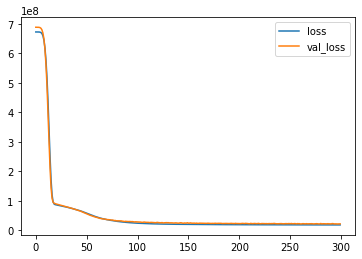

In [184]:
kayipVerisi.plot()

##  Eğer epochs u çok yüksek tutarsak ezberleme yapabilir ama bu işimize yaramaz, grafikte loss ile val_loss yaklastıktan sonra ciddi bir kopukluk yasarsa(biri asagı biri yukarı) ezberleme olustugunu anlayabiliriz

In [185]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [186]:
tahminDizisi=model.predict(x_test) # tahmin dizisinde test x e göre test y leri elde ederiz,bu tahminler için birde gerçek degerlerde vardır

In [187]:
tahminDizisi

array([[20751.275],
       [21444.94 ],
       [24462.775],
       ...,
       [25038.998],
       [ 9671.914],
       [23477.   ]], dtype=float32)

In [188]:
mean_absolute_error(y_test,tahminDizisi)
# 3350 pound luk bir hata var tahmin ile testte bulunan y leri karşılastırdık

3367.734050606837

In [189]:
dataFrame.describe() 

,year,price,mileage,tax,mpg,engineSize
count,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000,12987.000000
mean,2017.285516,24074.855779,22133.367367,129.676215,55.438392,2.051059
std,2.189633,9866.601115,21197.472376,65.167429,15.025902,0.532313
min,1997.000000,650.000000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,17355.000000,6320.000000,125.000000,45.600000,1.700000
50%,2018.000000,22299.000000,15371.000000,145.000000,56.500000,2.000000
75%,2019.000000,28706.000000,31986.500000,145.000000,64.200000,2.100000
max,2020.000000,65990.000000,259000.000000,580.000000,217.300000,6.200000


## Ortalaması 24074 pound olan fiyatta 3350 lik bir hata yaptık yani yaklasık %13 bunu daha fazla kötü veri temizleyerek yada nöron,katman sayısı epochs vs ile değişiklik yaparak değiştirebiliriz ancak ezberleme yapmasını da engellememiz gerekli

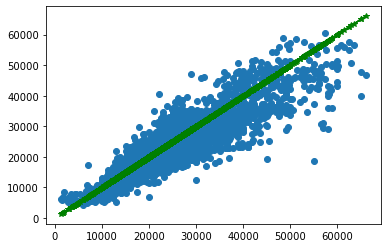

In [190]:
plt.scatter(y_test,tahminDizisi) # grafikte çok garip bir durum yok, daha fazla düzenlenebilir
plt.plot(y_test,y_test,"g*-") 

In [191]:
dataFrame.iloc[2] # 2. verinin degerlerini getir

year           2020.0
price         65980.0
mileage        3999.0
tax             145.0
mpg              28.0
engineSize        4.0
Name: 3191, dtype: float64

In [192]:
newCarseries= dataFrame.drop("price",axis=1).iloc[2] # verilerimizden 2. veriyi cıkarttık

In [193]:
type(newCarseries) # seri olmasının sebebi dataframe içinden 1 tane seriyi alıyor olmamız

pandas.core.series.Series

In [194]:
newCarseries # price ı silinmiş sekilde aldık

year          2020.0
mileage       3999.0
tax            145.0
mpg             28.0
engineSize       4.0
Name: 3191, dtype: float64

In [195]:
#newCarseries =scaler.transform(newCarseries.values) # scale(ölceklendirip) edip
# hata aldık çünkü shapende bozukluk var diye hata alıyoruz

In [196]:
newCarseries =scaler.transform(newCarseries.values.reshape(-1,5))
# 2 boyutlu yapmak için rshape yapmamız gerekli

In [197]:
model.predict(newCarseries) # newCarseries i tahmın et

array([[57607.16]], dtype=float32)